<a href="https://colab.research.google.com/github/Sanjana-Sarma/NTTF_Training/blob/main/Exercise95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from google.colab import files

In [2]:
uploaded=files.upload()

Saving 2022_US_Region_Mobility_Report.csv to 2022_US_Region_Mobility_Report.csv


In [3]:
df=pd.read_csv("2022_US_Region_Mobility_Report.csv")
df.drop(df[['country_region_code','country_region','place_id']],axis=1, inplace=True)
df

,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,NaN,NaN,NaN,NaN,NaN,2022-01-01,-43.0,-33.0,-26.0,-41.0,-44.0,12.0
1,NaN,NaN,NaN,NaN,NaN,2022-01-02,-20.0,-12.0,-26.0,-22.0,-17.0,7.0
2,NaN,NaN,NaN,NaN,NaN,2022-01-03,-14.0,-1.0,-24.0,-32.0,-38.0,13.0
3,NaN,NaN,NaN,NaN,NaN,2022-01-04,-14.0,1.0,-19.0,-30.0,-30.0,11.0
4,NaN,NaN,NaN,NaN,NaN,2022-01-05,-16.0,0.0,-19.0,-32.0,-28.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
747964,Wyoming,Weston County,NaN,NaN,56045.0,2022-10-10,NaN,NaN,NaN,NaN,-26.0,NaN
747965,Wyoming,Weston County,NaN,NaN,56045.0,2022-10-11,NaN,NaN,NaN,NaN,-20.0,NaN
747966,Wyoming,Weston County,NaN,NaN,56045.0,2022-10-12,NaN,NaN,NaN,NaN,-17.0,NaN
747967,Wyoming,Weston County,NaN,NaN,56045.0,2022-10-13,NaN,NaN,NaN,NaN,-15.0,NaN


In [4]:
df.isnull().sum()

sub_region_1                                             288
sub_region_2                                           14976
metro_area                                            747969
iso_3166_2_code                                       733281
census_fips_code                                       15181
date                                                       0
retail_and_recreation_percent_change_from_baseline    267072
grocery_and_pharmacy_percent_change_from_baseline     321483
parks_percent_change_from_baseline                    563784
transit_stations_percent_change_from_baseline         461675
workplaces_percent_change_from_baseline                 9070
residential_percent_change_from_baseline              280514
dtype: int64

In [5]:
df.dropna(subset=['sub_region_1'],inplace=True)
df.dropna(subset=['sub_region_2'],inplace=True)
df.drop(df[['metro_area','iso_3166_2_code','census_fips_code']], axis=1, inplace=True)
df.head(5)

,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
576,Alabama,Autauga County,2022-01-01,-43.0,-27.0,NaN,NaN,-34.0,12.0
577,Alabama,Autauga County,2022-01-02,-28.0,-15.0,-44.0,NaN,4.0,8.0
578,Alabama,Autauga County,2022-01-03,0.0,9.0,NaN,NaN,-27.0,9.0
579,Alabama,Autauga County,2022-01-04,0.0,12.0,NaN,NaN,-21.0,9.0
580,Alabama,Autauga County,2022-01-05,-6.0,9.0,NaN,NaN,-16.0,7.0


In [6]:
df['date']=pd.to_datetime(df['date'])
df.head()

,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
576,Alabama,Autauga County,2022-01-01,-43.0,-27.0,NaN,NaN,-34.0,12.0
577,Alabama,Autauga County,2022-01-02,-28.0,-15.0,-44.0,NaN,4.0,8.0
578,Alabama,Autauga County,2022-01-03,0.0,9.0,NaN,NaN,-27.0,9.0
579,Alabama,Autauga County,2022-01-04,0.0,12.0,NaN,NaN,-21.0,9.0
580,Alabama,Autauga County,2022-01-05,-6.0,9.0,NaN,NaN,-16.0,7.0


In [7]:
df.dtypes

sub_region_1                                                  object
sub_region_2                                                  object
date                                                  datetime64[ns]
retail_and_recreation_percent_change_from_baseline           float64
grocery_and_pharmacy_percent_change_from_baseline            float64
parks_percent_change_from_baseline                           float64
transit_stations_percent_change_from_baseline                float64
workplaces_percent_change_from_baseline                      float64
residential_percent_change_from_baseline                     float64
dtype: object

In [8]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df.head()

,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,year,month,day
576,Alabama,Autauga County,2022-01-01,-43.0,-27.0,NaN,NaN,-34.0,12.0,2022,1,1
577,Alabama,Autauga County,2022-01-02,-28.0,-15.0,-44.0,NaN,4.0,8.0,2022,1,2
578,Alabama,Autauga County,2022-01-03,0.0,9.0,NaN,NaN,-27.0,9.0,2022,1,3
579,Alabama,Autauga County,2022-01-04,0.0,12.0,NaN,NaN,-21.0,9.0,2022,1,4
580,Alabama,Autauga County,2022-01-05,-6.0,9.0,NaN,NaN,-16.0,7.0,2022,1,5


In [9]:
df['year'].value_counts()

2022    732993
Name: year, dtype: int64

In [10]:
df['sub_region_1'].value_counts()
df['sub_region_2'].value_counts()

Washington County    7867
Jefferson County     6439
Franklin County      6171
Jackson County       5638
Lincoln County       5259
                     ... 
Big Stone County        2
Barber County           1
Wolfe County            1
Sargent County          1
Cherry County           1
Name: sub_region_2, Length: 1697, dtype: int64

In [11]:
df_encoded=pd.get_dummies(df, columns=['sub_region_1','sub_region_2'])
df_encoded.head()

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,year,month,day,...,sub_region_2_Yellow Medicine County,sub_region_2_Yellowstone County,sub_region_2_Yoakum County,sub_region_2_Yolo County,sub_region_2_York County,sub_region_2_Young County,sub_region_2_Yuba County,sub_region_2_Yuma County,sub_region_2_Zapata County,sub_region_2_Zavala County
576,2022-01-01,-43.0,-27.0,NaN,NaN,-34.0,12.0,2022,1,1,...,0,0,0,0,0,0,0,0,0,0
577,2022-01-02,-28.0,-15.0,-44.0,NaN,4.0,8.0,2022,1,2,...,0,0,0,0,0,0,0,0,0,0
578,2022-01-03,0.0,9.0,NaN,NaN,-27.0,9.0,2022,1,3,...,0,0,0,0,0,0,0,0,0,0
579,2022-01-04,0.0,12.0,NaN,NaN,-21.0,9.0,2022,1,4,...,0,0,0,0,0,0,0,0,0,0
580,2022-01-05,-6.0,9.0,NaN,NaN,-16.0,7.0,2022,1,5,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_encoded.shape

(732993, 1757)

In [13]:
df.fillna(df.mean(),inplace=True)
df.isnull().sum()

<ipython-input-13-922ffc95d673>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(),inplace=True)
<ipython-input-13-922ffc95d673>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(),inplace=True)


sub_region_1                                          0
sub_region_2                                          0
date                                                  0
retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              0
year                                                  0
month                                                 0
day                                                   0
dtype: int64

In [14]:
df.shape

(732993, 12)

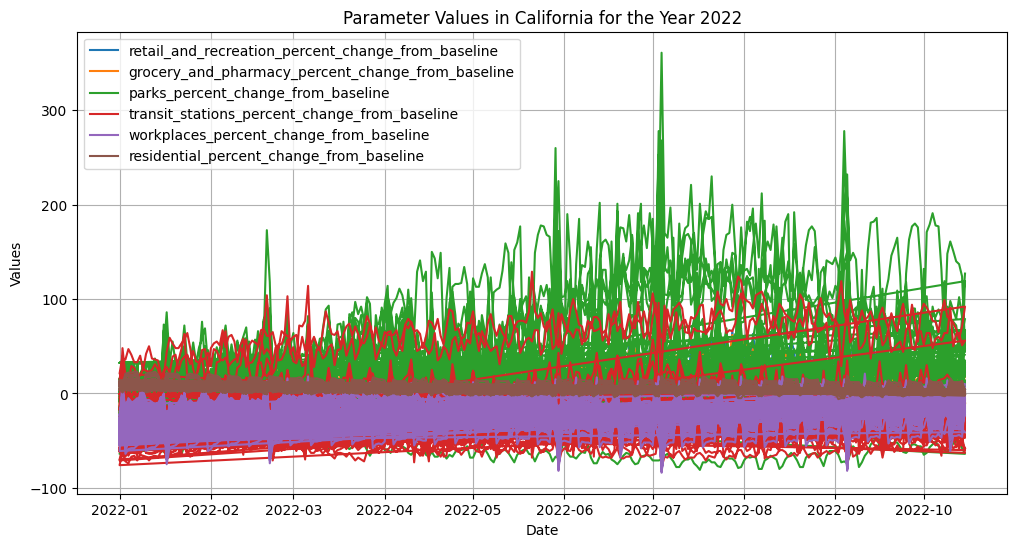

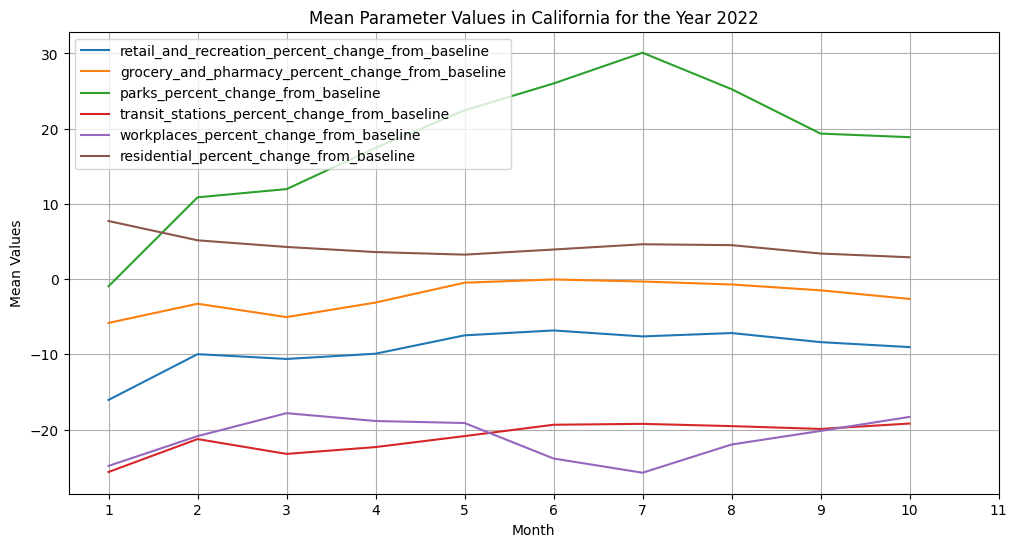

In [21]:
# Filter data for the state of California
ca_data = df[df['sub_region_1'] == 'California']

# Define the movement categories to be plotted
categories = [
'retail_and_recreation_percent_change_from_baseline',
'grocery_and_pharmacy_percent_change_from_baseline',
'parks_percent_change_from_baseline',
'transit_stations_percent_change_from_baseline',
'workplaces_percent_change_from_baseline',
'residential_percent_change_from_baseline'
]

# Plot changes in the selected movement categories on the same graph
plt.figure(figsize=(12, 6))

for category in categories:
    plt.plot(ca_data['date'], ca_data[category], label=category)

plt.xlabel('Date')
plt.ylabel('Values')
plt.title(f'Parameter Values in California for the Year 2022')
plt.legend()
plt.grid()
plt.show()

monthly_means = ca_data.groupby('month')[categories].mean()

# Create a plot for the mean values of parameters for each month
plt.figure(figsize=(12, 6))

for category in categories:
    plt.plot(monthly_means.index, monthly_means[category], label=category)

plt.xlabel('Month')
plt.ylabel('Mean Values')
plt.title(f'Mean Parameter Values in California for the Year 2022')
plt.xticks(range(1,12,1))
plt.legend()
plt.grid()
plt.show()


There is a tendency in percentage increase towards the end of the year as compared to the beginning when lockdown was more strict.
Transit and workplace usage is at an all time low in comparison to other baselines whereas parks are being traversed the most even at the time of lockdown.

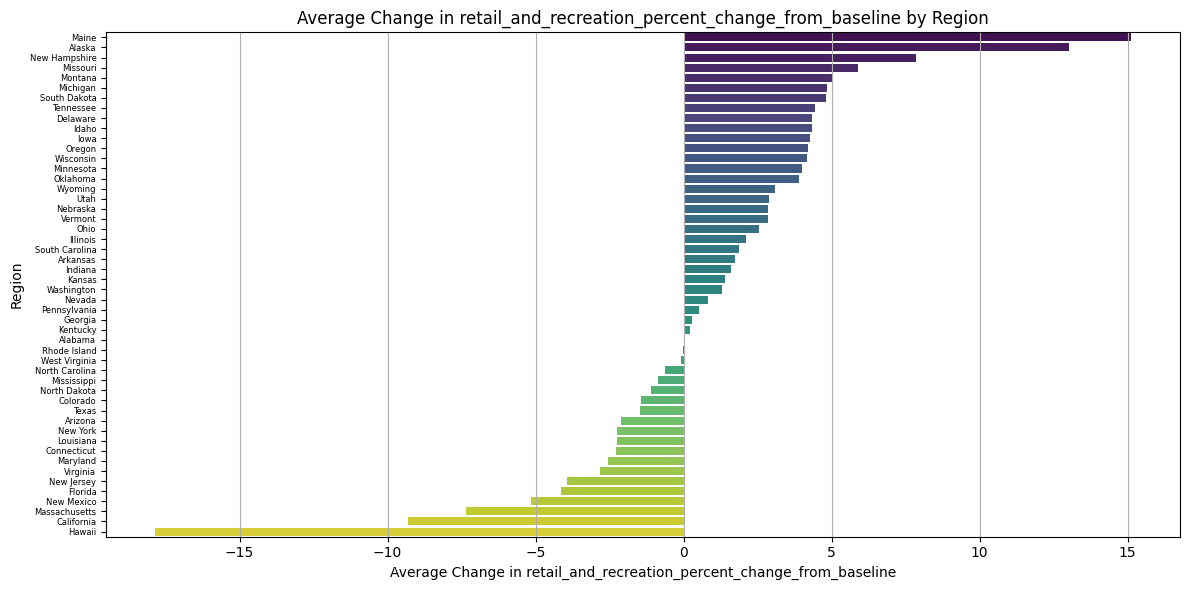

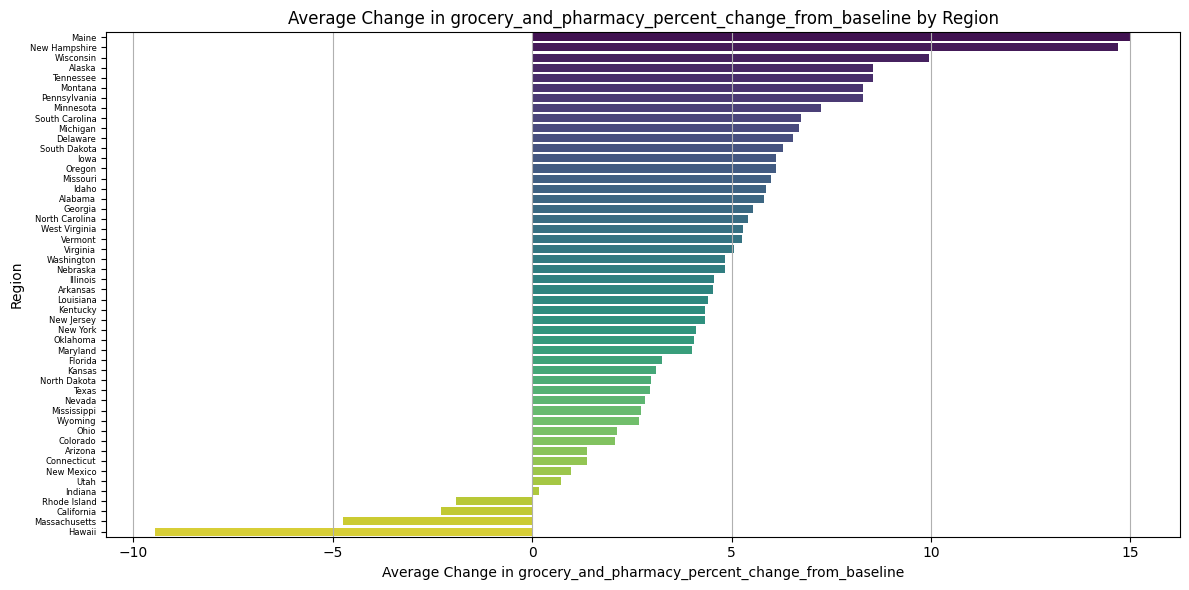

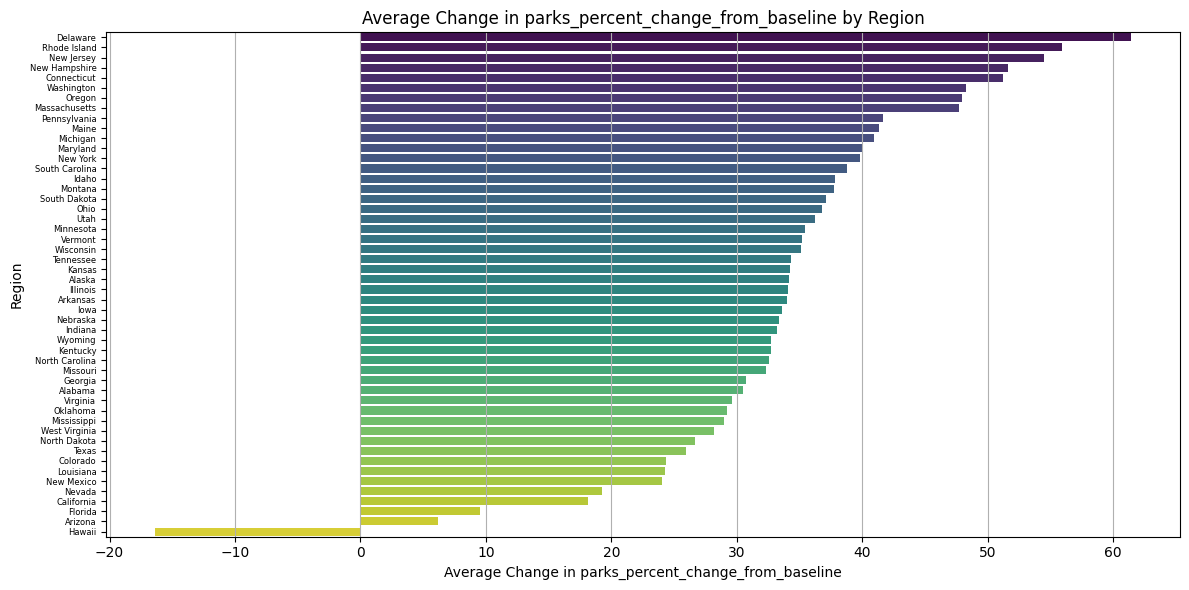

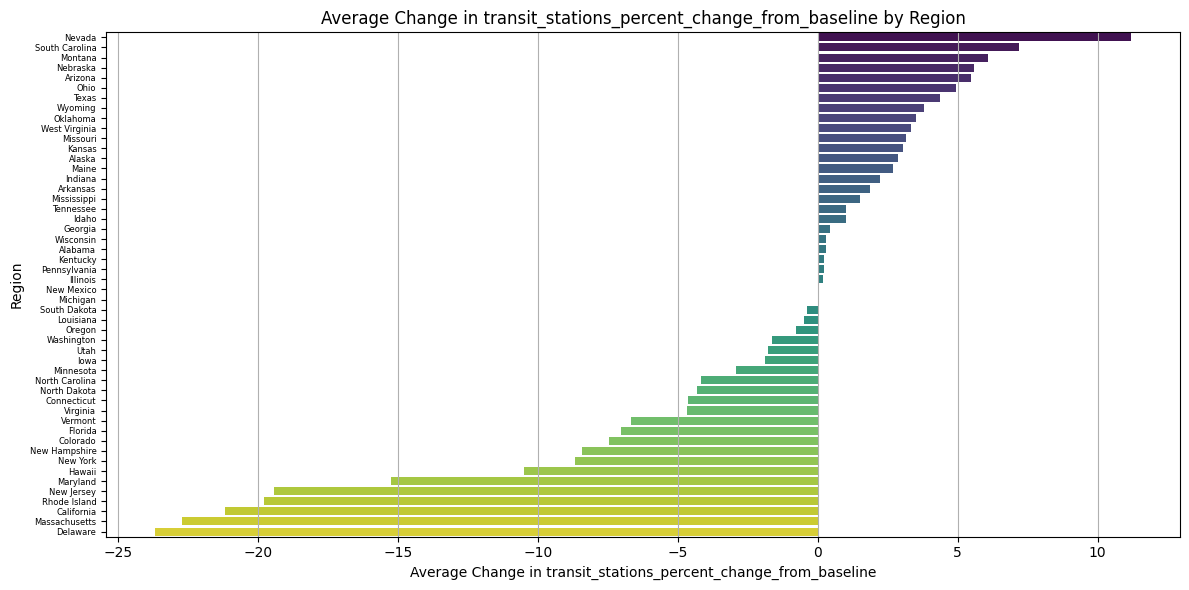

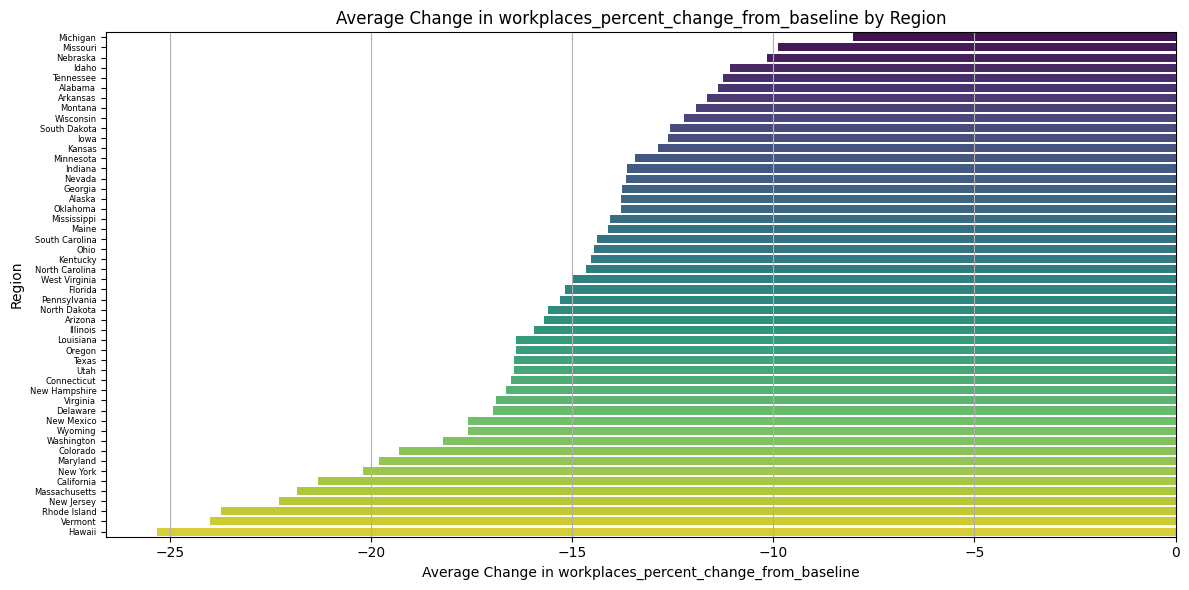

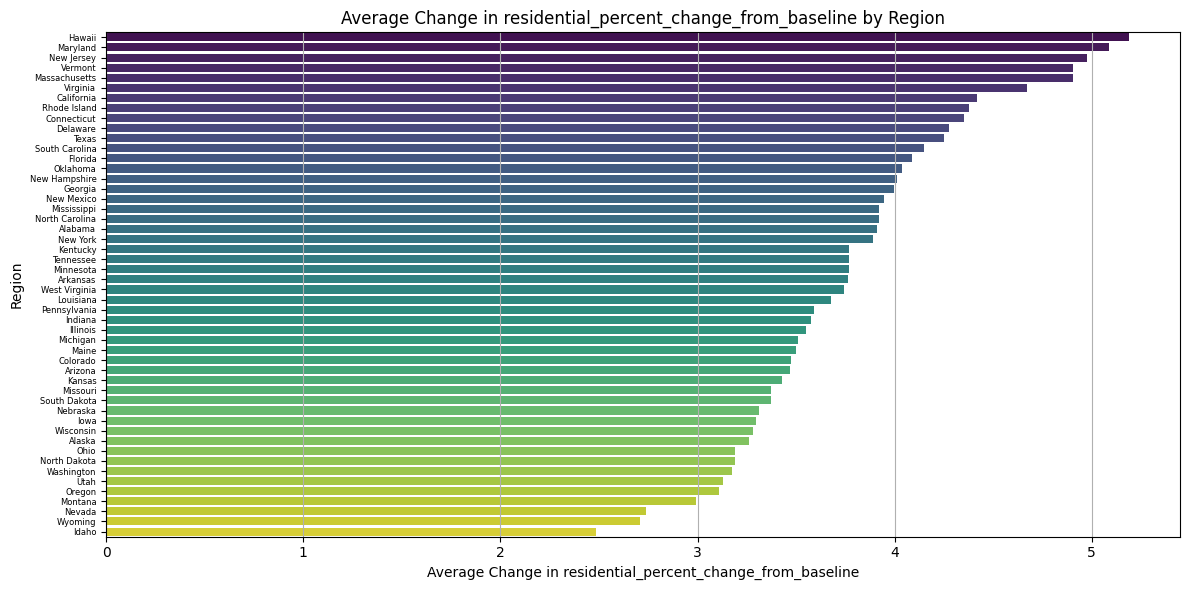

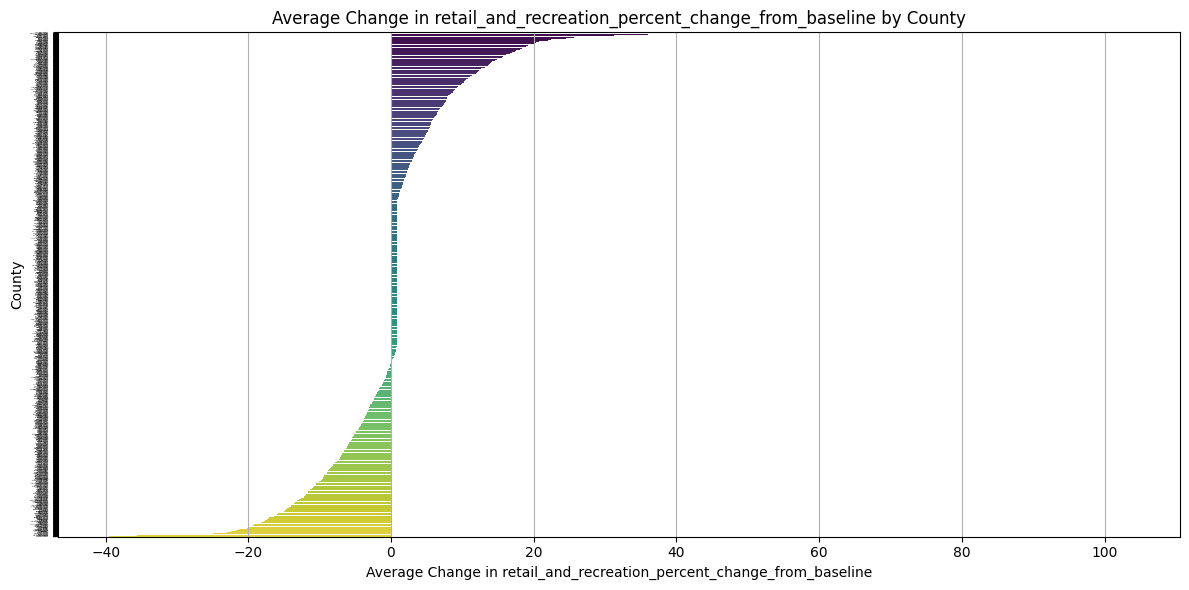

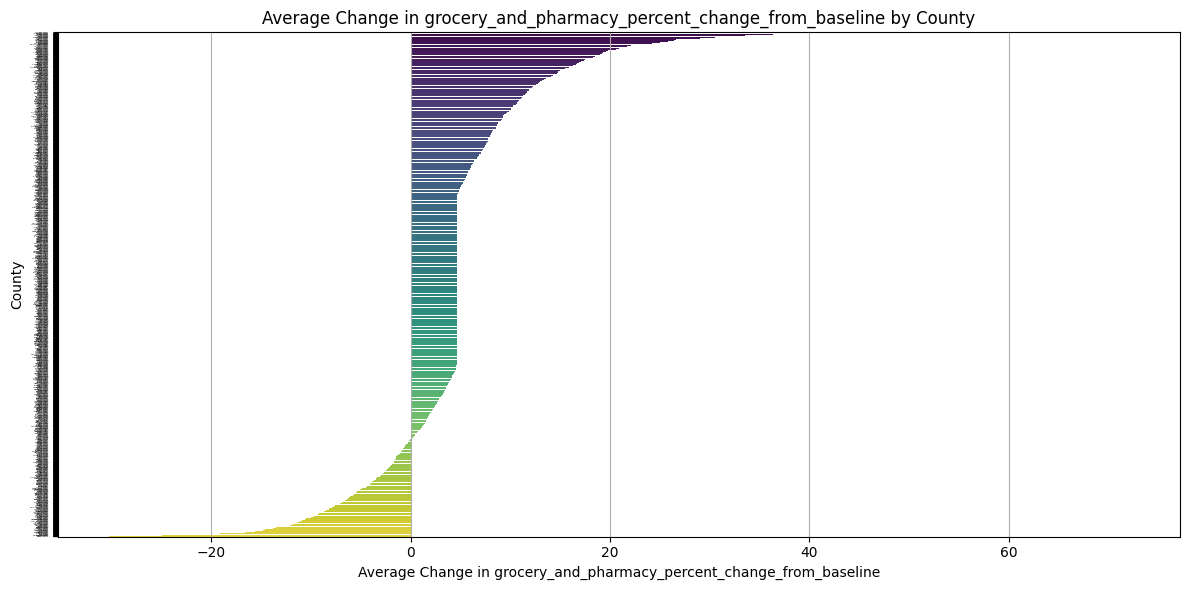

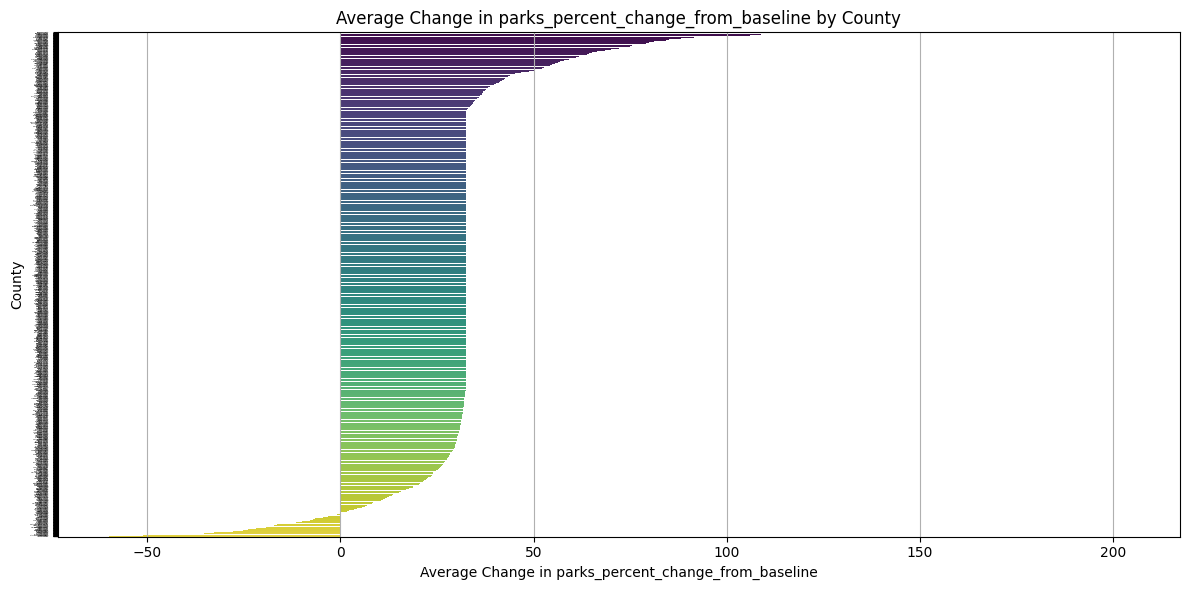

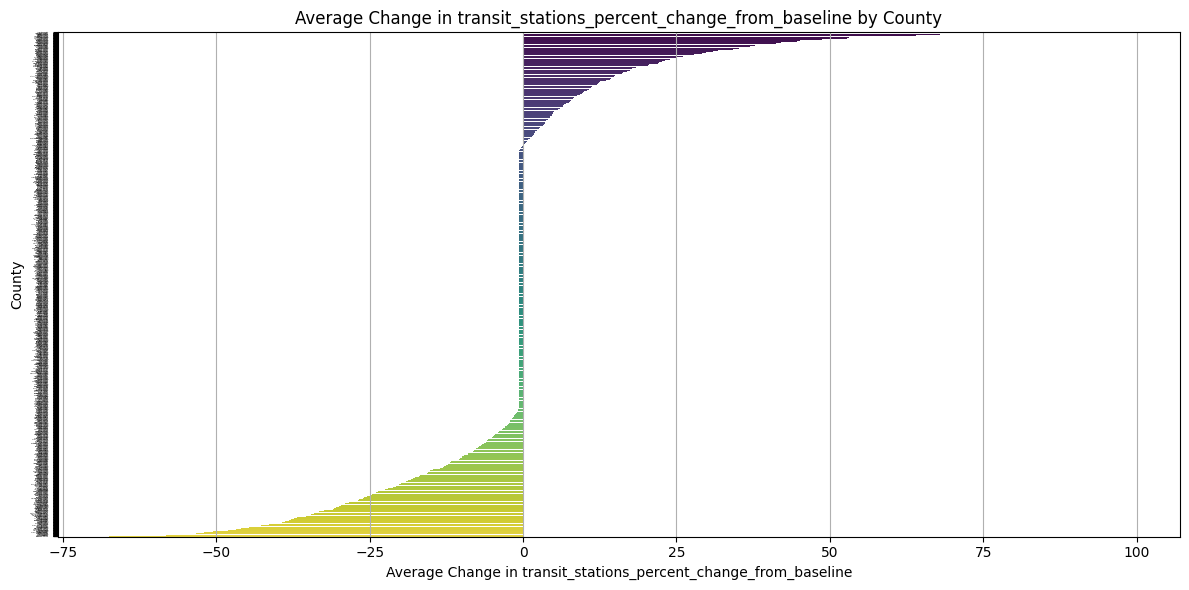

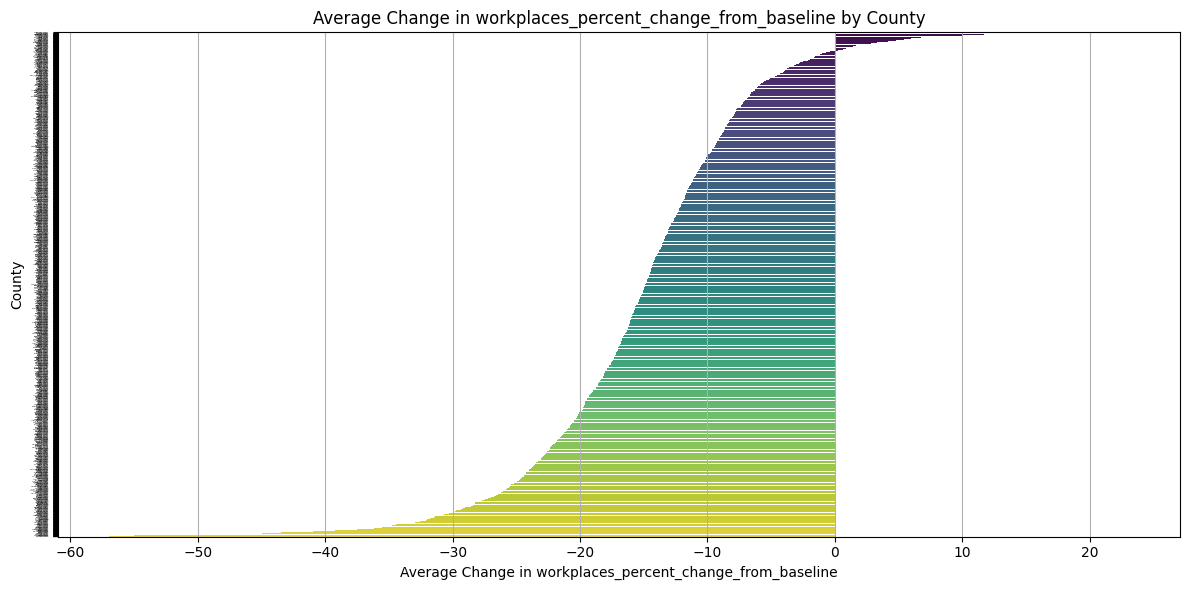

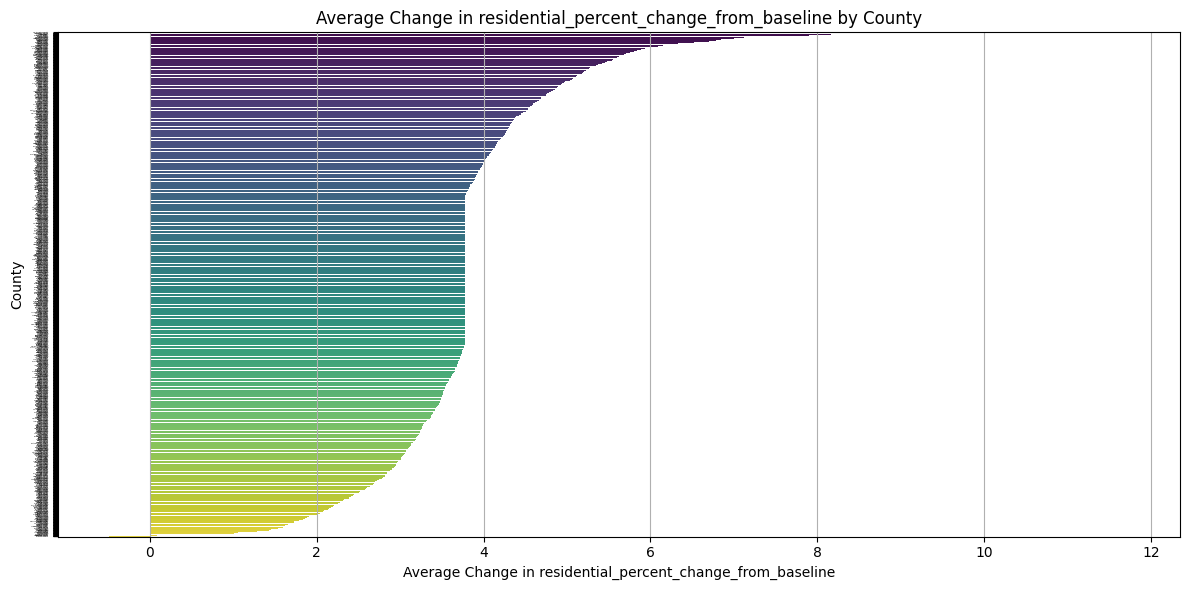

In [24]:
import seaborn as sns

# Iterate through the categories and create bar charts for each
for category in categories:
    # Group data by region (sub_region_1) and calculate the average change for the category
    region_avg = df.groupby('sub_region_1')[category].mean().reset_index()
    region_avg = region_avg.sort_values(by=category, ascending=False)

    # Create a bar chart for regions
    plt.figure(figsize=(12, 6))
    sns.barplot(x=category, y='sub_region_1', data=region_avg, palette='viridis')
    plt.xlabel(f'Average Change in {category}')
    plt.ylabel('Region')
    plt.title(f'Average Change in {category} by Region')
    plt.yticks(fontsize=6)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

# Group data by county (sub_region_2) and calculate the average change for each category
county_avg = df.groupby('sub_region_2')[categories].mean().reset_index()

# Create separate bar charts for counties for each category
for category in categories:
    plt.figure(figsize=(12, 6))
    county_avg_sorted = county_avg.sort_values(by=category, ascending=False)
    sns.barplot(x=category, y='sub_region_2', data=county_avg_sorted, palette='viridis')
    plt.xlabel(f'Average Change in {category}')
    plt.ylabel('County')
    plt.title(f'Average Change in {category} by County')
    plt.yticks(fontsize=1)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()
